# Análisis de métricas de distancia en k-NN

En este notebook exploraremos diferentes métricas de distancia para el algoritmo k-NN usando el dataset de los vinos. Analizaremos:

1. Distancia de Minkowski (que incluye Euclidiana y Manhattan como casos especials)
2. Distancia de Manhattan (la vemos específicamente aunque esté incluida en la anterior)
3. Distancia del Coseno

## Métricas de Distancia: ¿cuándo se puede usar cada una?

### Distancia de Minkowski
- Es una generalización de otras distancias (Euclidiana y Manhattan son casos especiales)
- Fórmula: d(x,y) = (Σ|xi - yi|^p)^(1/p)
- Cuando p=2: Distancia Euclidiana
- Cuando p=1: Distancia Manhattan
- Mejor para: Datos numéricos continuos donde todas las características están en la misma escala

### Distancia de Manhattan
- También conocida como distancia L1 o 'city block'
- El término "Manhattan" se popularizó porque este tipo de distancia describe bien los desplazamientos en ciudades diseñadas con calles en cuadrícula, como el distrito de Manhattan en Nueva York.
- Fórmula: d(x,y) = Σ|xi - yi|
- Mejor para:
  * Datos en grid o estructura de calles
  * Cuando las diferencias deben medirse en valores absolutos
  * Datos con valores atípicos (es menos sensible que la Euclidiana)

### Distancia del Coseno
- Mide el ángulo entre dos vectores
- Fórmula: cos(θ) = (x·y)/(||x||·||y||)
- Mejor para:
  * Datos de alta dimensionalidad (como texto)
  * Cuando la magnitud no importa, solo la dirección
  * Datos dispersos (sparse)

In [ ]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Configuración de visualización
print(plt.style.available)
print(sns.palettes.SEABORN_PALETTES)

# Configuración de estilo
plt.style.use('seaborn-v0_8')  # Configura el estilo general
sns.set_palette('deep')  # Configura una paleta válida de colores


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB48

In [ ]:
# Cargamos los datos
wine = load_wine()
X = wine.data
y = wine.target


# Convertimos el dataset de sklearn a un DataFrame de pandas
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Agregamos la columna de la clase (target) al DataFrame
wine_df['class'] = wine.target

# Visualizamos el resumen estadístico de los datos
print("Resumen estadístico de los datos:")
print(wine_df.describe())

# Mostramos las primeras filas del dataset
print("\nPrimeras filas del dataset:")
print(wine_df.head())

Resumen estadístico de los datos:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453  

In [1]:
# Preparamos los datos

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalamos los datos: esto asegura que todas las características tengan la misma escala, lo cual es básico para que algoritmos como k-NN funcionen bien ya que son muy sensibles a las magnitudes.
scaler = StandardScaler() # ajusta cada característica para que tenga: media = 0 y desviación estándar = 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Dimensiones de los datos:')
print(f'X_train: {X_train_scaled.shape}')
print(f'X_test: {X_test_scaled.shape}')

NameError: name 'train_test_split' is not defined

## Comparación de Diferentes Métricas

Vamos a crear una función que entrene y evalúe modelos con diferentes métricas de distancia.

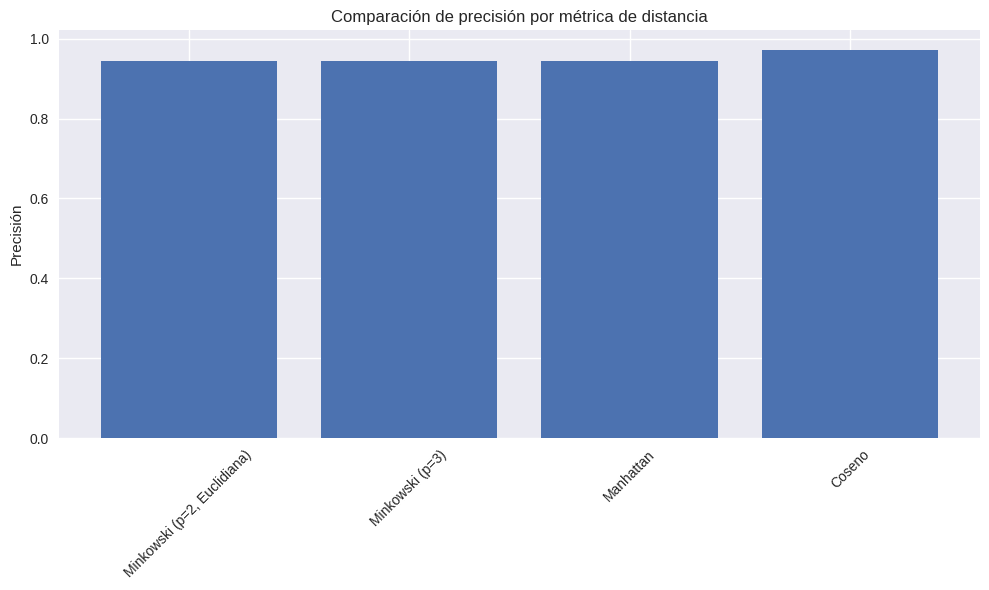

Minkowski (p=2, Euclidiana): 0.9444
Minkowski (p=3): 0.9444
Manhattan: 0.9444
Coseno: 0.9722


In [ ]:
def evaluate_metric(X_train, X_test, y_train, y_test, metric, **kwargs):
    """Evalúa k-NN con una métrica específica"""
    # Creamos y entrenamos el modelo
    knn = KNeighborsClassifier(metric=metric, **kwargs)
    knn.fit(X_train, y_train)

    # Hacemos predicciones
    y_pred = knn.predict(X_test)

    # Calculamos la precisión
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, knn

# Probamos diferentes métricas
metrics = {
    'Minkowski (p=2, Euclidiana)': {'metric': 'minkowski', 'p': 2},
    'Minkowski (p=3)': {'metric': 'minkowski', 'p': 3},
    'Manhattan': {'metric': 'manhattan'},
    'Coseno': {'metric': 'cosine'}
}

results = {}
for name, params in metrics.items():
    accuracy, model = evaluate_metric(
        X_train_scaled, X_test_scaled, y_train, y_test,
        n_neighbors=3, **params
    )
    results[name] = accuracy

# Visualizamos los resultados
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Comparación de precisión por métrica de distancia')
plt.xticks(rotation=45)
plt.ylabel('Precisión')
plt.tight_layout()
plt.show()

# Mostramos los resultados numéricos
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.4f}')

## Visualización de las Diferencias entre Métricas

Vamos a visualizar cómo cada métrica define los vecinos más cercanos en un espacio 2D.

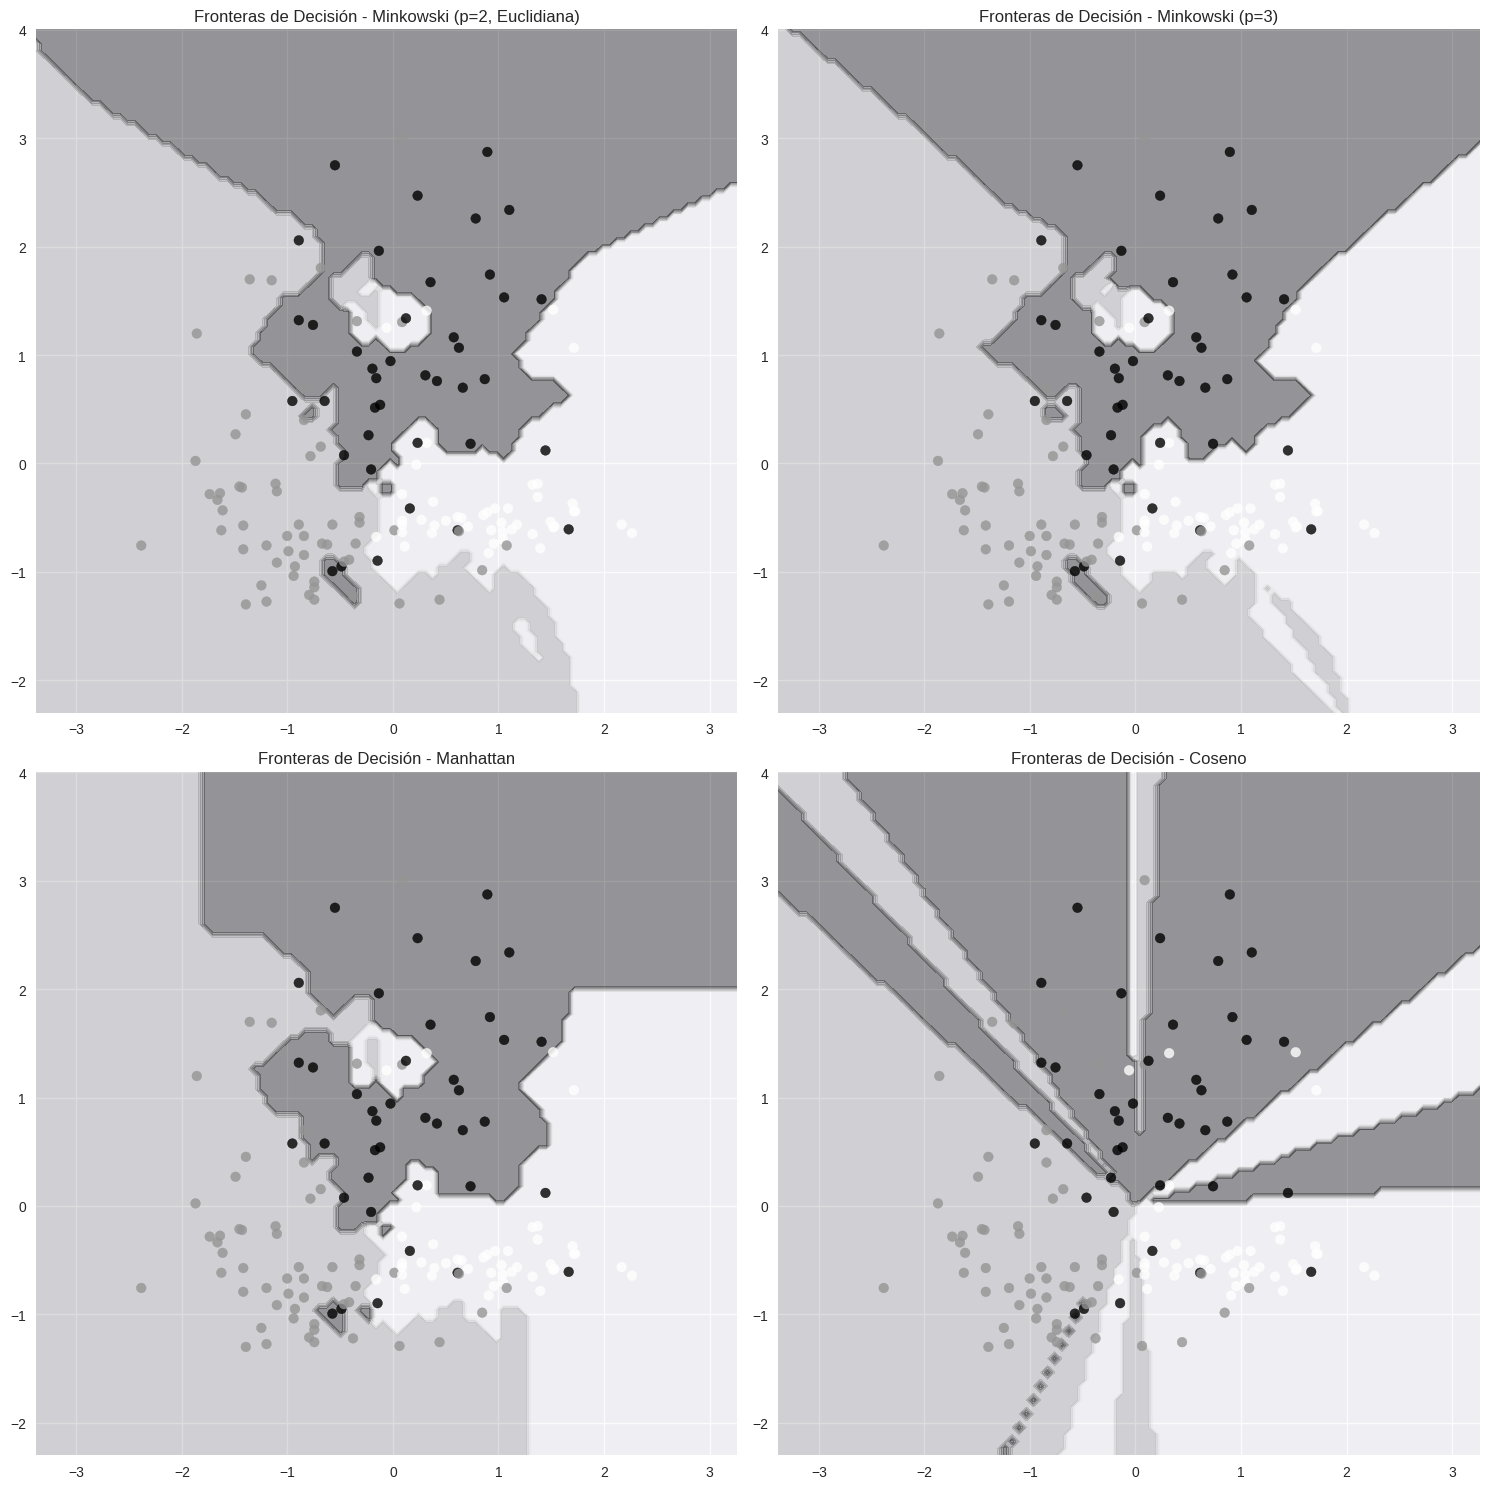

In [ ]:
def plot_decision_boundaries(X, y, metrics, title_prefix=""):
    """Visualiza las fronteras de decisión para diferentes métricas."""
    n_metrics = len(metrics)
    fig, axes = plt.subplots(2, 2, figsize=(15, 15)) # Se crean 4 gráficos (2x2), uno para cada métrica de distancia.
    axes = axes.ravel() # Se usa ravel para iterar fácilmente sobre los ejes.

    # Creamos una malla de puntos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100)) # Aquí se crea una cuadrícula de puntos (xx, yy) que abarca todo el rango de las dos características seleccionadas, con un margen de 1 unidad.

    for idx, (name, params) in enumerate(metrics.items()):
        # Entrenamos el modelo
        knn = KNeighborsClassifier(n_neighbors=3, **params)  # K=3
        knn.fit(X, y)

        # Hacemos predicciones en la malla
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Dibujamos el contorno
        axes[idx].contourf(xx, yy, Z, alpha=0.4) # Dibuja las fronteras de decisión, mostrando qué región pertenece a cada clase.
        axes[idx].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8) # Superpone los datos originales, coloreados según sus clases.
        axes[idx].set_title(f'{title_prefix}{name}')

    plt.tight_layout()
    plt.show()

# Usamos solo las dos primeras características para visualización
X_vis = X_train_scaled[:, :2]
plot_decision_boundaries(X_vis, y_train, metrics,
                        "Fronteras de Decisión - ")

### ¿Cómo se interpretan las gráficas de fronteras de decisión?
1. Fronteras de decisión:
Las áreas coloreadas en el gráfico representan las regiones donde el modelo clasifica los puntos a una clase específica.
Las líneas de contorno marcan las transiciones entre las clases. Por ejemplo:
Si un punto está en una región azul, el modelo lo clasifica como clase azul.
Si un punto está cerca de una frontera, significa que su clasificación depende de qué vecinos se consideren.
2. Densidad y distribución de puntos:
Los puntos dispersos sobre el gráfico son los datos reales del conjunto de entrenamiento.
Los colores de los puntos corresponden a sus clases reales.
3. Comparación entre métricas:
Minkowski (Euclidiana, p=2):
Genera bordes de decisión circulares o elípticos.
Es adecuada para datos con relaciones homogéneas entre características.
Minkowski (p=3):
Penaliza más las diferencias grandes, lo que puede producir fronteras más ajustadas o irregulares.
Manhattan:
Genera fronteras con formas cuadradas debido a su cálculo basado en distancias absolutas.
Es más robusta frente a valores atípicos.
Coseno:
Las fronteras dependen de los ángulos entre los puntos, lo que genera formas más complejas en la clasificación.
4. Limitaciones:
Estas visualizaciones solo son precisas para las dos características seleccionadas. En datasets con más dimensiones, las fronteras pueden variar significativamente.

In [ ]:
# Mostrar las clases y su descripción
print(f"Clases identificadas: {set(y)}")
print("Descripción de las clases:")
for i, name in enumerate(wine.target_names):
    print(f"Clase {i}: {name}")

# Estas clases corresponden a tipos específicos de vino basados en su composición química y otras propiedades medidas.

Clases identificadas: {0, 1, 2}
Descripción de las clases:
Clase 0: class_0
Clase 1: class_1
Clase 2: class_2


## Análisis de Resultados

### Características de cada métrica:

1. **Minkowski (Euclidiana, p=2)**:
   - La más común y versátil
   - Funciona bien cuando las características están en escalas similares
   - Es sensible a valores atípicos

2. **Minkowski (p=3)**:
   - Da más peso a diferencias grandes
   - Útil cuando queremos penalizar más las diferencias grandes
   - Puede ser más sensible a valores atípicos que p=2

3. **Manhattan**:
   - Más robusta a valores atípicos que la Euclidiana
   - Útil en datos con características discretas
   - Puede ser mejor cuando las características son independientes

4. **Coseno**:
   - Ignora la magnitud de los vectores
   - Útil cuando solo importa la dirección de los vectores
   - Común en análisis de texto y datos dispersos

### Recomendaciones de uso:

1. **Usa distancia Euclidiana cuando**:
   - Los datos son numéricos continuos
   - Las características están en escalas similares
   - Las relaciones entre características son importantes

2. **Usa distancia Manhattan cuando**:
   - Hay valores atípicos significativos
   - Las características son independientes
   - Los datos están en una estructura tipo grid

3. **Usa distancia del coseno cuando**:
   - Trabajas con texto o datos dispersos
   - La magnitud de los vectores no es importante
   - Quieres encontrar similitud en la dirección


## Prueba con diferentes valores de p en la distancia de Minkowski

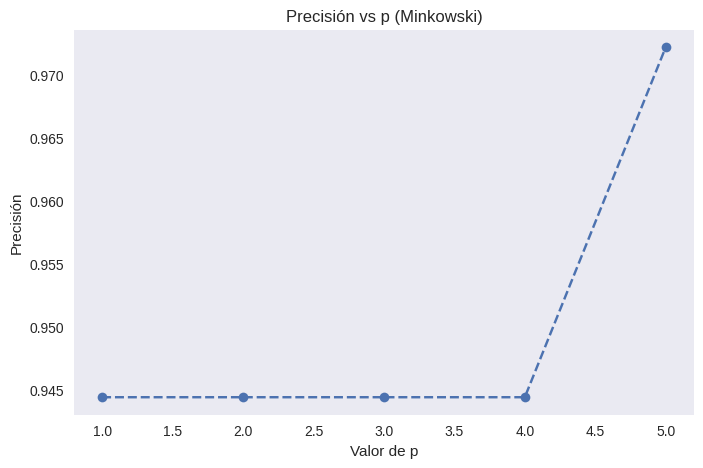

Minkowski con p=p=1: Precisión=0.9444
Minkowski con p=p=2: Precisión=0.9444
Minkowski con p=p=3: Precisión=0.9444
Minkowski con p=p=4: Precisión=0.9444
Minkowski con p=p=5: Precisión=0.9722


In [ ]:
# Exploramos diferentes valores de p en la distancia Minkowski
# Esto nos permite analizar cómo cambia la precisión al modificar este parámetro

# Valores de p que queremos probar
p_values = [1, 2, 3, 4, 5]

# Diccionario para almacenar los resultados
minkowski_results = {}

# Iteramos sobre los valores de p
for p in p_values:
    # Evaluamos el modelo k-NN con la métrica Minkowski y el valor de p
    accuracy, _ = evaluate_metric(
        X_train_scaled, X_test_scaled, y_train, y_test,
        metric='minkowski', p=p, n_neighbors=3  # Fijamos 3 vecinos
    )
    # Guardamos la precisión obtenida para este valor de p
    minkowski_results[f'p={p}'] = accuracy

# Visualizamos los resultados
plt.figure(figsize=(8, 5))
plt.plot(p_values, list(minkowski_results.values()), marker='o', linestyle='--')
plt.title('Precisión vs p (Minkowski)')
plt.xlabel('Valor de p')  # Etiqueta del eje x
plt.ylabel('Precisión')  # Etiqueta del eje y
plt.grid()  # Agregamos una cuadrícula para facilitar la lectura
plt.show()

# Mostramos los resultados numéricos en la consola
for p, acc in minkowski_results.items():
    print(f'Minkowski con p={p}: Precisión={acc:.4f}')


### Implementar validación cruzada para cada métrica

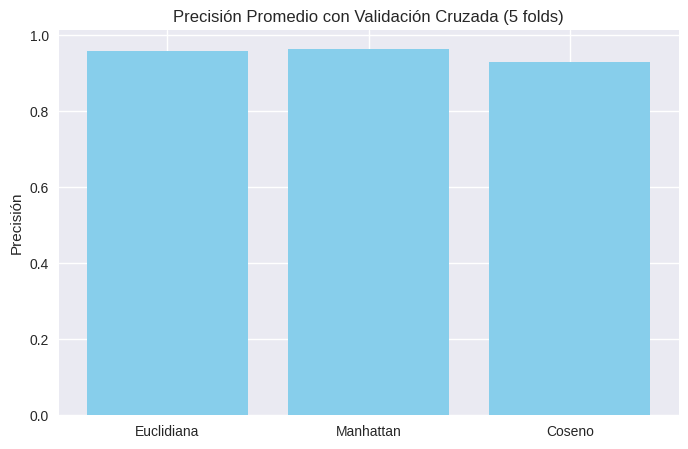

Euclidiana: Precisión Promedio=0.9576
Manhattan: Precisión Promedio=0.9643
Coseno: Precisión Promedio=0.9296


In [ ]:
from sklearn.model_selection import cross_val_score

# Usamos un diccionario con las métricas que queremos comparar
metrics_cv = {
    'Euclidiana': {'metric': 'minkowski', 'p': 2},  # Distancia Euclidiana
    'Manhattan': {'metric': 'manhattan'},           # Distancia Manhattan
    'Coseno': {'metric': 'cosine'}                 # Distancia del coseno
}

# Diccionario para almacenar los resultados de validación cruzada
cv_results = {}

# Iteramos sobre las métricas
for name, params in metrics_cv.items():
    # Creamos el modelo k-NN con los parámetros de la métrica
    knn = KNeighborsClassifier(n_neighbors=3, **params)

    # Realizamos validación cruzada con 5 particiones (5 folds)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)

    # Calculamos la precisión promedio y la guardamos
    cv_results[name] = scores.mean()

# Visualizamos los resultados
plt.figure(figsize=(8, 5))
plt.bar(cv_results.keys(), cv_results.values(), color='skyblue')
plt.title('Precisión Promedio con Validación Cruzada (5 folds)')
plt.ylabel('Precisión')  # Etiqueta del eje y
plt.show()

# Mostramos los resultados numéricos en la consola
for metric, accuracy in cv_results.items():
    print(f'{metric}: Precisión Promedio={accuracy:.4f}')


### Análisis del impacto de la normalización en cada métrica

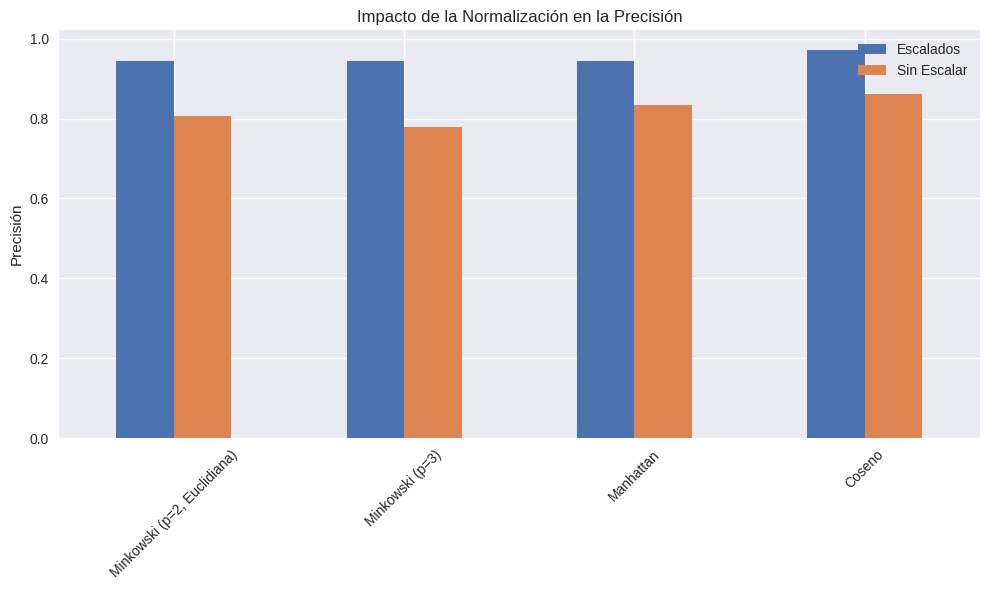

                             Escalados  Sin Escalar
Minkowski (p=2, Euclidiana)   0.944444     0.805556
Minkowski (p=3)               0.944444     0.777778
Manhattan                     0.944444     0.833333
Coseno                        0.972222     0.861111


In [ ]:
# Evaluamos las métricas usando los datos sin escalar
no_scaling_results = {}
for name, params in metrics.items():
    # Evaluamos cada métrica con datos sin escalar
    accuracy, _ = evaluate_metric(
        X_train, X_test, y_train, y_test,
        n_neighbors=3, **params
    )
    # Guardamos los resultados
    no_scaling_results[name] = accuracy

# Creamos un DataFrame para comparar los resultados
scaling_comparison = pd.DataFrame({
    'Escalados': results,       # Resultados con datos escalados
    'Sin Escalar': no_scaling_results  # Resultados sin escalar
})

# Visualizamos la comparación
scaling_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Impacto de la Normalización en la Precisión')
plt.ylabel('Precisión')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# Mostramos los resultados numéricos
print(scaling_comparison)


### Comparación del tiempo de ejecución de cada métrica

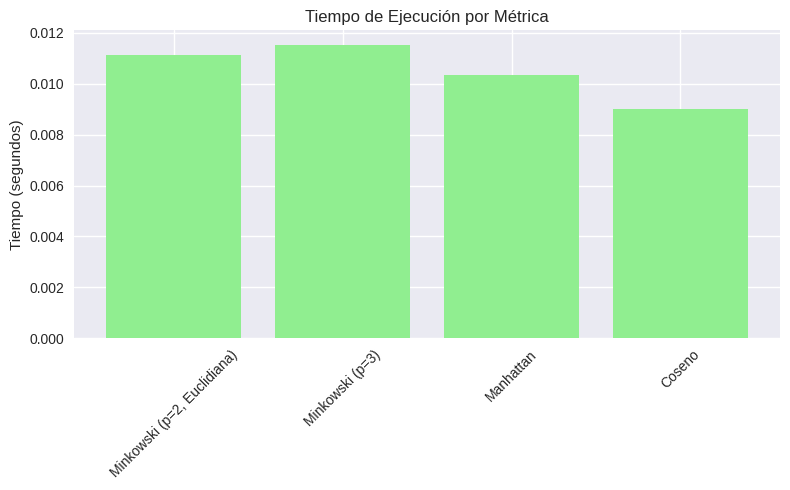

Minkowski (p=2, Euclidiana): Tiempo de Ejecución=0.0111 segundos
Minkowski (p=3): Tiempo de Ejecución=0.0115 segundos
Manhattan: Tiempo de Ejecución=0.0103 segundos
Coseno: Tiempo de Ejecución=0.0090 segundos


In [ ]:
import time

# Diccionario para almacenar los tiempos de ejecución
timing_results = {}

# Iteramos sobre las métricas
for name, params in metrics.items():
    # Registramos el tiempo inicial
    start = time.time()

    # Entrenamos y evaluamos el modelo
    _, model = evaluate_metric(
        X_train_scaled, X_test_scaled, y_train, y_test,
        n_neighbors=3, **params
    )

    # Registramos el tiempo final y calculamos la diferencia
    end = time.time()
    timing_results[name] = end - start

# Visualizamos los tiempos de ejecución
plt.figure(figsize=(8, 5))
plt.bar(timing_results.keys(), timing_results.values(), color='lightgreen')
plt.title('Tiempo de Ejecución por Métrica')
plt.ylabel('Tiempo (segundos)')
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# Mostramos los resultados numéricos en la consola
for metric, timing in timing_results.items():
    print(f'{metric}: Tiempo de Ejecución={timing:.4f} segundos')
